In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv('ipldata_19/matches.csv')

In [3]:
matches.shape

(756, 18)

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
# 1. How many matches are played in each season ?
# 2. Who won most player of the match award ?
# 3. Which team has won most matches ?
# 4. After winning toss teams takes mostly batting or fielding ?
# 5. How many matches Chennai Super Kings has Lost ?
# 6. How many teams has won by runs by margin of above 100 ?

In [6]:
matches['date'][0]

'2017-04-05'

In [7]:
matches['date'] = pd.to_datetime(matches['date'])

In [8]:
# matches['season'] = pd.to_datetime(matches['date']).dt.year

In [9]:
deliveries = pd.read_csv('ipldata_19/deliveries.csv')

In [10]:
deliveries.shape

(179078, 21)

In [11]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
six_df = deliveries[deliveries['batsman_runs'] == 6]

In [14]:
pd.value_counts(six_df['batsman']).head()

CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
Name: batsman, dtype: int64

In [17]:
deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head()

batsman
V Kohli      5434
SK Raina     5415
RG Sharma    4914
DA Warner    4741
S Dhawan     4632
Name: batsman_runs, dtype: int64

In [18]:
deliveries.groupby(['match_id','batting_team'])['total_runs'].sum().sort_values(ascending=False).head()

match_id  batting_team               
411       Royal Challengers Bangalore    263
7937      Kolkata Knight Riders          250
620       Royal Challengers Bangalore    248
206       Chennai Super Kings            246
11338     Kolkata Knight Riders          241
Name: total_runs, dtype: int64

In [19]:
deliveries.groupby(['match_id','batsman'])['batsman_runs'].sum().sort_values(ascending=False).head()

match_id  batsman       
411       CH Gayle          175
60        BB McCullum       158
562       AB de Villiers    133
7935      RR Pant           130
620       AB de Villiers    129
Name: batsman_runs, dtype: int64

In [21]:
pd.value_counts(matches['winner'])

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

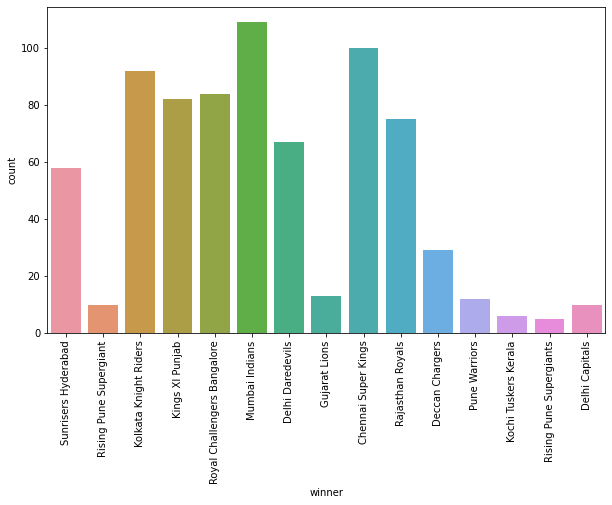

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x=matches['winner'], data=matches)
plt.xticks(rotation='vertical')
plt.show()

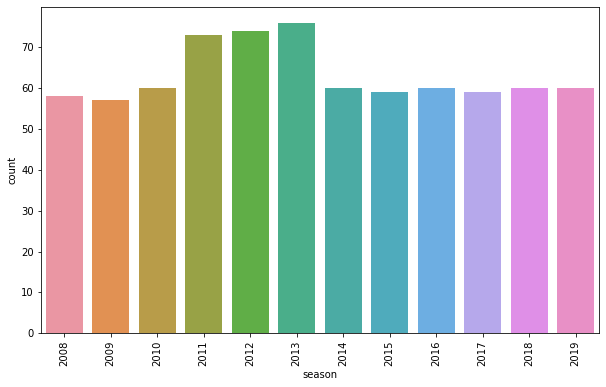

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x=matches['season'], data=matches)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

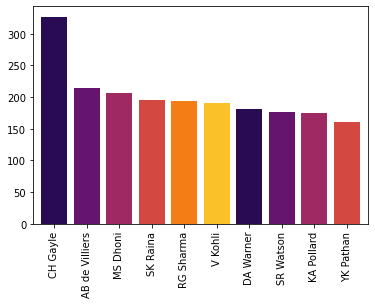

In [30]:
pd.value_counts(six_df['batsman']).head(10).plot.bar(width=0.8, color=sns.color_palette('inferno'))

<AxesSubplot:xlabel='match_id,batsman'>

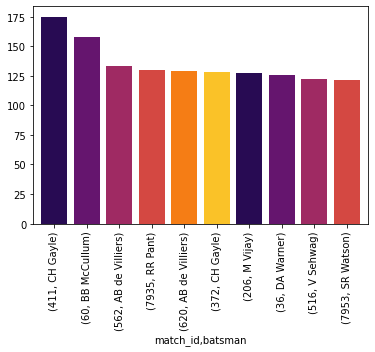

In [33]:
deliveries.groupby(['match_id','batsman'])['batsman_runs'].sum().sort_values(ascending=False).head(10).plot.bar(width=0.8, color=sns.color_palette('inferno'))